# In an Atari-style asteroid game, a player fires lasers at incoming asteroids. Each laser shot has a 40% chance of destroying an asteroid. During a level, the player fires 7 laser shots. What is the probability that the player destroys exactly 3 asteroids?

 Assumptions: 

 - Each laser shot is independent of the others.

 - The total number of shots is fixed at 7.

 - Only two outcomes are possible per shot: hit (success) or miss (failure).

 - We assumed each shot has a 40% chance of hitting an asteroid, treating shots as independent events. This simplifies modeling with a binomial distribution and represents an average player’s success rate, accounting for missed shots due to timing or asteroid movement.

Random Variable(s):

- Let X = the number of successful asteroid hits out of 7 shots.

- X follows a binomial distribution:

- X∼Binomial(n=7,p=0.4)

 One Trial of the Simulation:

- To simulate one trial, you generate 7 random outcomes (e.g., using a spinner, dice, or calculator). Each has a 40% chance of being a hit.

 “Success” and “Failure” Outcomes:

- Success (in a trial) = The player gets exactly 3 hits out of 7 shots.

- Failure (in a trial) = The player gets anything other than 3 hits

In [11]:
!pip install gymnasium
!pip install "gymnasium[atari]"
!pip install ale-py
!pip install autorom[accept-rom-license]"
!pip install pygame pandas


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
/bin/bash: -c: line 0: unexpected EOF while looking for matching `"'
/bin/bash: -c: line 1: syntax error: unexpected end of file
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 34.2 MB/s eta 0:00:00 0:00:010:00:01


In [13]:
import ale_py
import gymnasium as gym

# Register the ALE environments
gym.register_envs(ale_py)

# Now check the registry
gym.pprint_registry()


===== classic_control =====
Acrobot-v1                  CartPole-v0                 CartPole-v1
MountainCar-v0              MountainCarContinuous-v0    Pendulum-v1
===== phys2d =====
phys2d/CartPole-v0          phys2d/CartPole-v1          phys2d/Pendulum-v0
===== box2d =====
BipedalWalker-v3            BipedalWalkerHardcore-v3    CarRacing-v3
LunarLander-v3              LunarLanderContinuous-v3
===== toy_text =====
Blackjack-v1                CliffWalking-v1             CliffWalkingSlippery-v1
FrozenLake-v1               FrozenLake8x8-v1            Taxi-v3
===== tabular =====
tabular/Blackjack-v0        tabular/CliffWalking-v0
===== None =====
Ant-v2                      Ant-v3                      GymV21Environment-v0
GymV26Environment-v0        HalfCheetah-v2              HalfCheetah-v3
Hopper-v2                   Hopper-v3                   Humanoid-v2
Humanoid-v3                 HumanoidStandup-v2          InvertedDoublePendulum-v2
InvertedPendulum-v2         Pusher-v2             

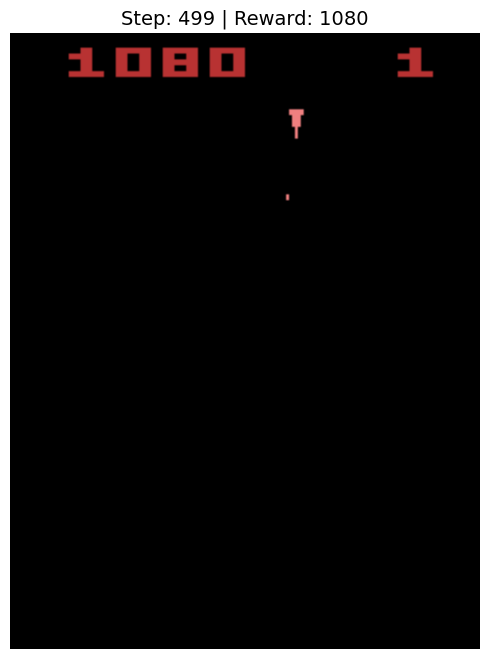

✅ Gameplay data saved to: asteroids_data_20251024_173348.csv
   step  action  reward  total_reward            timestamp
0     0       3     0.0           0.0  2025-10-24 17:28:55
1     1       2     0.0           0.0  2025-10-24 17:28:56
2     2       3     0.0           0.0  2025-10-24 17:28:57
3     3       1     0.0           0.0  2025-10-24 17:28:57
4     4       1     0.0           0.0  2025-10-24 17:28:58


In [24]:
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
import pandas as pd
import time
from datetime import datetime
import ale_py
import numpy as np

# --- Register Atari environments ---
gym.register_envs(ale_py)

# --- Create the Asteroids environment ---
env = gym.make('ALE/Asteroids-v5', render_mode='rgb_array')
observation, info = env.reset()

# --- Setup for display and data logging ---
fig, ax = plt.subplots(figsize=(10, 8))  # Larger figure to see shots
ax.axis('off')

total_reward = 0
data_log = []

# --- Run simulation ---
num_steps = 500  # Total frames to simulate

for step in range(num_steps):
    # Always fire (action 1), but randomly rotate left (2) or right (3) occasionally
    if np.random.rand() < 0.5:
        action = 2  # rotate left
    else:
        action = 3  # rotate right

    # Fire action combined (in ALE each step is one action, so we'll occasionally fire)
    fire_action = 1

    # Choose action randomly between firing or rotating, to simulate gameplay
    chosen_action = np.random.choice([fire_action, action])
    
    # Step through the environment
    observation, reward, terminated, truncated, info = env.step(chosen_action)
    total_reward += reward
    
    # Record data
    data_log.append({
        "step": step,
        "action": int(chosen_action),
        "reward": reward,
        "total_reward": total_reward,
        "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    })
    
    # Display the game frame
    clear_output(wait=True)
    ax.clear()
    ax.imshow(observation)
    ax.set_title(f"Step: {step} | Reward: {total_reward:.0f}", fontsize=14)
    ax.axis('off')
    display(fig)
    
    time.sleep(0.03)  # 30ms per frame
    
    # Reset if game over
    if terminated or truncated:
        observation, info = env.reset()
        total_reward = 0

# --- Cleanup ---
plt.close()
env.close()

# --- Save gameplay data ---
df = pd.DataFrame(data_log)
filename = f"asteroids_data_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
df.to_csv(filename, index=False)

print(f"✅ Gameplay data saved to: {filename}")
print(df.head())


Shots fired: 242
Asteroids destroyed: 8
Empirical hit probability (p): 0.033

Probability of exactly 3 hits in 7 shots: 0.001
Monte Carlo simulated probability: 0.001


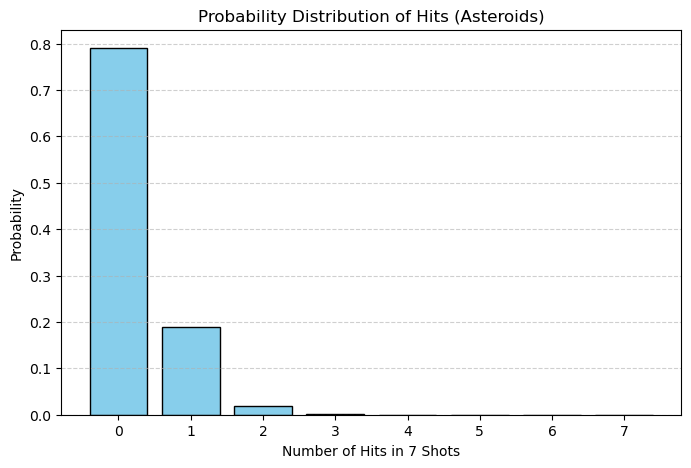

In [26]:
import pandas as pd
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

# --- Load your gameplay data ---
# If df is already in memory from simulation, skip this line
# df = pd.read_csv("asteroids_data_20251024_153200.csv")

# --- Step 1: Empirical hit probability ---
shots_fired = df[df["action"] == 1]  # Only frames where 'fire' action was taken
hits = shots_fired[shots_fired["reward"] > 0]  # Shots that actually hit/destroyed asteroids
p_hit = len(hits) / len(shots_fired)

print(f"Shots fired: {len(shots_fired)}")
print(f"Asteroids destroyed: {len(hits)}")
print(f"Empirical hit probability (p): {p_hit:.3f}")

# --- Step 2: Probability of exactly 3 hits in 7 shots (binomial) ---
n = 7
k = 3
prob_3_hits = binom.pmf(k, n, p_hit)
print(f"\nProbability of exactly 3 hits in 7 shots: {prob_3_hits:.3f}")

# --- Step 3: Monte Carlo simulation (optional) ---
num_simulations = 100000
sim_results = np.random.rand(num_simulations, n) < p_hit
sim_hits = sim_results.sum(axis=1)
prob_3_hits_sim = np.mean(sim_hits == 3)
print(f"Monte Carlo simulated probability: {prob_3_hits_sim:.3f}")

# --- Step 4: Visualize full probability distribution ---
hit_counts = np.arange(n+1)
probabilities = binom.pmf(hit_counts, n, p_hit)

plt.figure(figsize=(8,5))
plt.bar(hit_counts, probabilities, color="skyblue", edgecolor="black")
plt.xlabel("Number of Hits in 7 Shots")
plt.ylabel("Probability")
plt.title("Probability Distribution of Hits (Asteroids)")
plt.xticks(hit_counts)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


# Conclusion 

In our Asteroids simulation, the player’s hit probability was about 3.3% per shot. The binomial model predicts a 0.1% chance of hitting exactly 3 asteroids in 7 shots, which matches the Monte Carlo simulation result. This shows that with such a low hit rate, getting multiple hits in one round is very rare, and the theoretical model aligns well with the simulated gameplay outcomes.